# Age of Death

## Data Process

In [1]:
import time

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

RANDOM_STATE = 666666

In [2]:
# Import Data

df = pd.read_csv('outputData.csv', sep=',')
df = df.dropna(subset = ['Age of Death'])
X = df[['Gender', 'Occupation', 'Country', 'Birth Year']]
Y = df['Age of Death']

In [3]:
# LabelEncoder

X_LE = np.zeros((len(X.T), len(X)))
LE = preprocessing.LabelEncoder()
for i in range(len(X.T)):
    LE.fit(X.T.to_numpy()[i])
    X_LE[i] = LE.transform(X.T.to_numpy()[i])
X_LE = X_LE.T

Y_np = Y.to_numpy()
for i in range(10, 110, 5):
    Y_np[np.where((Y_np >= i) & (Y_np < i+5))] = np.array([i for j in range(len(Y_np[np.where((Y_np >= i) & (Y_np < i+5))]))])
Y_np[np.where(Y_np < 10)] = np.array([5 for j in range(len(Y_np[np.where(Y_np < 10)]))])
Y_np[np.where(Y_np >= 115)] = np.array([115 for j in range(len(Y_np[np.where(Y_np >= 115)]))])

In [4]:
# Standzardization

X_S = np.zeros((len(X_LE.T), len(X_LE)))
for i in range(len(X_LE.T)):
    X_S[i] = (X_LE.T[i]-np.min(X_LE.T[i]))/(np.max(X_LE.T[i])-np.min(X_LE.T[i]))
X_S = X_S.T

In [5]:
# Create training and test data sets

x = X_S
y = Y_np.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_STATE)

## SVR

Loop 1 :
CPU times: total: 3min 49s
Wall time: 3min 49s
CPU times: total: 6min 1s
Wall time: 6min 1s
CPU times: total: 1min 26s
Wall time: 1min 26s
Loop 2 :
CPU times: total: 3min 32s
Wall time: 3min 32s
CPU times: total: 7min 13s
Wall time: 7min 14s
CPU times: total: 1min 40s
Wall time: 1min 40s
Loop 3 :
CPU times: total: 4min 16s
Wall time: 4min 16s
CPU times: total: 6min 33s
Wall time: 6min 33s
CPU times: total: 1min 38s
Wall time: 1min 38s
Loop 4 :
CPU times: total: 4min 4s
Wall time: 4min 4s
CPU times: total: 6min 37s
Wall time: 6min 37s
CPU times: total: 1min 37s
Wall time: 1min 37s
Loop 5 :
CPU times: total: 4min 3s
Wall time: 4min 3s
CPU times: total: 6min 32s
Wall time: 6min 32s
CPU times: total: 1min 38s
Wall time: 1min 38s
Loop 6 :
CPU times: total: 4min
Wall time: 4min
CPU times: total: 6min 32s
Wall time: 6min 32s
CPU times: total: 1min 23s
Wall time: 1min 23s
Loop 7 :
CPU times: total: 4min 13s
Wall time: 4min 13s
CPU times: total: 6min 17s
Wall time: 6min 18s
CPU times: 

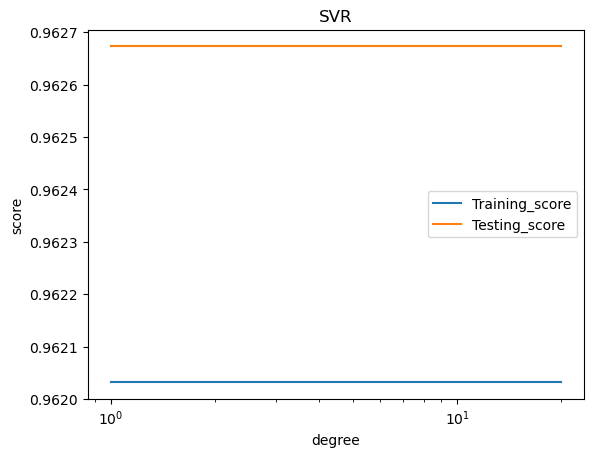

In [6]:
degrees = np.arange(1,21,1)
train_scores_svr = []
test_scores_svr = []
num = 1
for degree in degrees:
    print('Loop', num, ':')
    num = num + 1
    cls = svm.SVR(degree = degree)
    %time cls.fit(x_train, y_train)
    %time train_scores_svr.append(cls.score(x_train, y_train))
    %time test_scores_svr.append(cls.score(x_test, y_test))

# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(degrees, train_scores_svr, label='Training_score')
ax.plot(degrees, test_scores_svr, label='Testing_score')
ax.set_xlabel(r'degree')
ax.set_ylabel(r'score')
ax.set_xscale('log')
ax.set_title('SVR')
ax.legend(loc='best')
plt.show()

In [7]:
# Fitting SVR model

optimise_degree = degrees[test_scores_svr.index(max(test_scores_svr))]
print(optimise_degree)

svr = svm.SVR(degree = optimise_degree)
%time svr.fit(x_train, y_train)

# Return the mean accuracy on the given test data and labels.

%time svr_score = svr.score(x_test, y_test)
svr_score

1
CPU times: total: 3min 5s
Wall time: 3min 5s
CPU times: total: 1min 16s
Wall time: 1min 16s


0.962672928749003

## Figure

CPU times: total: 1min 16s
Wall time: 1min 16s


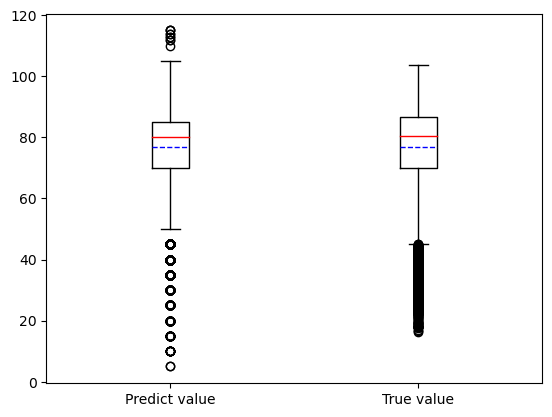

In [8]:
%time pre_svr = svr.predict(x_test)
plt.boxplot([y_test, pre_svr], medianprops = {'color': 'red'}, meanline = True, showmeans = True, meanprops = {'color': 'blue', 'ls': '--'}, labels = {'True value', 'Predict value'})
plt.show()